In [7]:
import os
import sys
import librosa
import tflearn
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


# Pre-processing

In [8]:
os.chdir('C:/Users/karti/Speech/LibriSpeech/dev-clean/')

In [13]:
path="84/121123/84-121123-0000.flac"

In [14]:
# os.chdir('/home/cc/Data/')
# path = 'spoken_numbers_pcm/'

In [15]:
# Load a wav file
y, sr = librosa.load(path)
# Play it back!
IPython.display.Audio(data=y, rate=sr)

In [16]:
# mfcc - mel-frequency cepstral coefficients
mfcc = librosa.feature.mfcc(y=y, sr=sr)

In [19]:
len(mfcc[0])

91

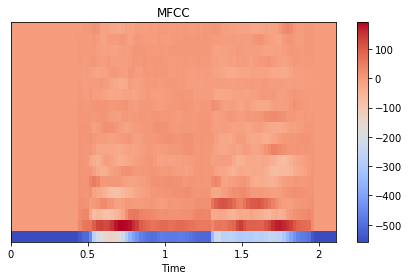

In [20]:
# visualize mfcc
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

In [21]:
# now for a spectrogram
m_spect = librosa.feature.melspectrogram(y=y, sr=sr)
# decompose a spectrogram with NMF, and then resynthesize an individual component
D = librosa.stft(y)

# Separate the magnitude and phase
S, phase = librosa.magphase(D)

# Decompose by nmf
components, activations = librosa.decompose.decompose(S, n_components=8, sort=True)

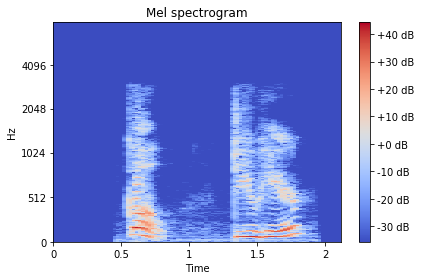

In [22]:
librosa.display.specshow(librosa.amplitude_to_db(S), y_axis='mel', fmax=8000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

In [18]:
# def speaker(file):  # vom Dateinamen
#   # if not "_" in file:
#   #   return "Unknown"
#   return file.split("_")[0]
# def one_hot_from_item(item, items):
#   # items=set(items) # assure uniqueness
#   x=[0]*len(items)# numpy.zeros(len(items))
#   i=items.index(item)
#   x[i]=1
#   return x
# def get_speakers(path):
#   files = os.listdir(path)
#   def nobad(file):
#     return "_" in file and not "." in file.split("_")[0]
#   speakers=list(set(map(speaker,filter(nobad,files))))
#   print(len(speakers)," speakers: ",speakers)
#   return speakers

In [19]:
speakers = os.listdir()

In [20]:
speakers

['.ipynb_checkpoints',
 '1272',
 '1462',
 '1673',
 '174',
 '1919',
 '1988',
 '1993',
 '2035',
 '2078',
 '2086',
 '2277',
 '2412',
 '2428',
 '251',
 '2803',
 '2902',
 '3000',
 '3081',
 '3170',
 '3536',
 '3576',
 '3752',
 '3853',
 '422',
 '5338',
 '5536',
 '5694',
 '5895',
 '6241',
 '6295',
 '6313',
 '6319',
 '6345',
 '652',
 '777',
 '7850',
 '7976',
 '8297',
 '84',
 '8842',
 'mfccs.pkl',
 'y.txt']

In [21]:
# # now put all of the mfccs into an array
# #os.chdir('/home/cc/Data/' + path)
# os.chdir('/home/cc/Data/all/')
# speakers = get_speakers(os.getcwd())
# audio_files = os.listdir(os.getcwd())
# mfccs = []
# Y = []
# for f in audio_files:
#     Y.append(one_hot_from_item(speaker(f), speakers))
#     y, sr = librosa.load(f)
#     mfccs.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13))

In [ ]:
mfccs = []
Y = []
for i in speakers :
    inside=os.listdir('C:/Users/karti/Speech/LibriSpeech/dev-clean/'+i+"/")
    for j in inside:
        audio_files=os.listdir('C:/Users/karti/Speech/LibriSpeech/dev-clean/'+i+"/"+j+"/")
        for f in audio_files[:-1]:
            Y.append(i)
            y, sr = librosa.load('C:/Users/karti/Speech/LibriSpeech/dev-clean/'+i+"/"+j+"/"+f)
            mfccs.append(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13))

In [ ]:
len(Y)

In [ ]:
len(mfccs)

In [105]:
for i in mfccs :
    print(i)
    break

[[-522.7668   -515.66626  -513.8235   ... -485.81516  -505.5318
  -514.6937  ]
 [  64.715996   64.95058    64.13158  ...   46.16326    44.002697
    51.715702]
 [ -22.540722  -28.363934  -26.858059 ...  -34.779663  -25.97107
   -16.214996]
 ...
 [  20.605968   18.849167   11.366068 ...   16.41185    14.264247
    19.458672]
 [  15.702921   17.29557    18.998367 ...   26.050562   23.323408
    23.051651]
 [ -15.025084  -18.910011  -14.075328 ...  -19.647621  -17.061909
   -13.475512]]


In [54]:
# from pydub import AudioSegment as audio
# waves = []
# for f in audio_files:
#     waves.append(audio.from_wav(f))
# for f,w in zip(audio_files,waves):
#     print(w.duration_seconds)

In [74]:
# len(mfccs[0][0])

253

In [78]:
# type(mfccs)

list

In [109]:
# with open('mfccs.txt', 'w') as f:
#     for item in mfccs:
#         f.write("%s\n" % item)

In [23]:
# with open('y.txt', 'w') as f:
#     for item in Y:
#         f.write("%s\n" % item)

In [40]:
os.getcwd() 

'C:\\Users\\karti\\Speech\\LibriSpeech\\dev-clean'

# Reload

In [2]:
import os
import sys
import librosa
import tflearn
import tensorflow as tf
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms
%matplotlib inline

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
Instructions for updating:
Colocations handled automatically by placer.


In [3]:
os.chdir('C:/Users/karti/Speech/LibriSpeech/dev-clean/')

In [4]:
new_y=[]
f = open("y.txt", "r")
for x in f:
  new_y.append(int(x.strip()))

In [5]:
len(new_y)

2703

In [6]:
new_y = np.array(new_y).reshape(-1,1)

In [7]:
# import pickle
# with open('mfccs.pkl', 'wb') as f:
#     pickle.dump(mfccs, f)

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(new_y)
res=le.transform(new_y)

C:\Users\karti\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\karti\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
res=res.reshape(-1, 1)
enc.fit(res)
res=enc.transform(res).toarray()

In [10]:
res[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [11]:
import pickle
new_mfccs=[]
with open('mfccs.pkl', 'rb') as f:
    new_mfccs = pickle.load(f)

In [12]:
len(new_mfccs)

2703

In [13]:
uni=[]
for i in new_y:
    if(i not in uni):
        uni.append(i)

In [14]:
len(uni)

40

In [15]:
print((new_mfccs[0][0]).mean())

-320.3857


In [16]:
len(new_mfccs)

2703

In [17]:
new_mfccs[200]

array([[-422.61273   , -420.83978   , -421.63156   , ..., -474.38013   ,
        -474.8237    , -455.48975   ],
       [  47.226917  ,   46.655884  ,   49.06836   , ...,   48.494804  ,
          46.773216  ,   48.03399   ],
       [ -28.221333  ,  -29.218151  ,  -22.760973  , ...,    9.897391  ,
           8.224331  ,  -11.62133   ],
       ...,
       [  -6.1200995 ,   -6.310774  ,   -4.5463758 , ...,   -6.9940376 ,
          -5.34544   ,    3.0775084 ],
       [  10.111799  ,   13.743115  ,   21.587517  , ...,    0.93357164,
          -2.2579224 ,   -6.3719716 ],
       [   3.061989  ,    9.477272  ,   14.413259  , ...,   11.6231785 ,
           6.7680616 ,    5.625402  ]], dtype=float32)

In [78]:
new_mfccs_mean=[]

In [79]:
for i in range(len(new_mfccs)):
    mid=[]
    for j in range (len(new_mfccs[i])):
        mid.append(new_mfccs[i][j].mean())
    new_mfccs_mean.append(mid)

In [80]:
len(new_mfccs_mean)

2703

In [81]:
new_mfccs_mean[0]

[-320.3857,
 109.65589,
 2.827534,
 42.29012,
 -28.974195,
 31.407747,
 -23.65616,
 15.919064,
 -13.056216,
 4.2290907,
 -0.3749217,
 1.9312313,
 6.444122]

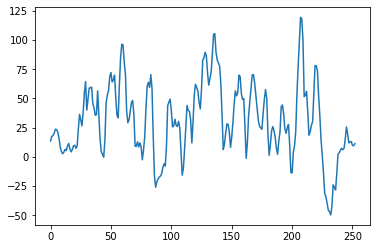

In [82]:
plt.plot([i for i in range (len((new_mfccs[0][5])))], new_mfccs[0][5])

In [83]:
# #append mean
# 13*512
# # flatten 

In [84]:
# from sklearn import preprocessing
# le = preprocessing.LabelEncoder()
# le.fit(new_y)
# res=le.transform(new_y)

In [85]:
# 13*512
# #RMS prop
# gaussian distribution se mean variation use karke append


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfccs_mean, res, test_size=0.33, random_state=42)

In [87]:
# net =None
# model=None

In [27]:
net = tflearn.input_data(shape=[None, 13]) #Two wave chunks
net = tflearn.fully_connected(net, 256, activation='relu')
net = tflearn.dropout(net, 0.4)
net = tflearn.fully_connected(net, 128, activation='relu')
net = tflearn.dropout(net, 0.25)
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.dropout(net, 0.2)
net = tflearn.fully_connected(net, len(uni), activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [28]:
model = tflearn.DNN(net)

Instructions for updating:
Use tf.cast instead.


In [89]:
model

In [90]:
model.fit(X_train, y_train, n_epoch=1000, show_metric=True, batch_size=128,snapshot_step=100)

Training Step: 22499  | total loss: 1.46832 | time: 0.043s
| Adam | epoch: 1000 | loss: 1.46832 - acc: 0.5232 -- iter: 1792/1811
Training Step: 22500  | total loss: 1.51644 | time: 0.046s
| Adam | epoch: 1000 | loss: 1.51644 - acc: 0.5186 -- iter: 1811/1811
--


In [193]:
history =  model.fit(X_train, y_train, n_epoch=1000, show_metric=True, batch_size=128,snapshot_step=100)

Training Step: 37499  | total loss: 1.56587 | time: 0.039s
| Adam | epoch: 2000 | loss: 1.56587 - acc: 0.5349 -- iter: 1792/1811
Training Step: 37500  | total loss: 1.58115 | time: 0.042s
| Adam | epoch: 2000 | loss: 1.58115 - acc: 0.5268 -- iter: 1811/1811
--


In [201]:
#1000

In [202]:
y_pred = model.predict(X_train)

In [203]:
np.sum(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))/len(y_train)

0.8343456653782441

In [204]:
y_pred = model.predict(X_test)

In [208]:
np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

0.7522421524663677

In [207]:
res_mean=np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

In [206]:
# Save a model
model.save('model_mean.tflearn')
# Load a model
# model.load('my_model.tflearn')

INFO:tensorflow:C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn is not in all_model_checkpoint_paths. Manually adding it.


# Reload Saved Model

In [4]:
net = tflearn.input_data(shape=[None, 13]) #Two wave chunks
net = tflearn.fully_connected(net, 256, activation='relu')
net = tflearn.dropout(net, 0.4)
net = tflearn.fully_connected(net, 128, activation='relu')
net = tflearn.dropout(net, 0.25)
net = tflearn.fully_connected(net, 64, activation='relu')
net = tflearn.dropout(net, 0.2)
net = tflearn.fully_connected(net, 40, activation='softmax')
net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')
model = tflearn.DNN(net)
model.load('model_mean.tflearn')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn


In [97]:
model.load('model_mean.tflearn')

INFO:tensorflow:Restoring parameters from C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn


In [ ]:
# tf.reset_default_graph()

In [2]:
# len(y_test)

In [1]:
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test, y_pred)

In [28]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(new_mfccs_mean, res, test_size=0.33, random_state=42)

In [24]:
# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')
# res=res.reshape(-1, 1)
# enc.fit(res)
# res=enc.transform(res).toarray()

# LSTM

In [26]:
new_mfccs[200]

array([[-422.61273   , -420.83978   , -421.63156   , ..., -474.38013   ,
        -474.8237    , -455.48975   ],
       [  47.226917  ,   46.655884  ,   49.06836   , ...,   48.494804  ,
          46.773216  ,   48.03399   ],
       [ -28.221333  ,  -29.218151  ,  -22.760973  , ...,    9.897391  ,
           8.224331  ,  -11.62133   ],
       ...,
       [  -6.1200995 ,   -6.310774  ,   -4.5463758 , ...,   -6.9940376 ,
          -5.34544   ,    3.0775084 ],
       [  10.111799  ,   13.743115  ,   21.587517  , ...,    0.93357164,
          -2.2579224 ,   -6.3719716 ],
       [   3.061989  ,    9.477272  ,   14.413259  , ...,   11.6231785 ,
           6.7680616 ,    5.625402  ]], dtype=float32)

In [27]:
padding0_mfccs[200]

[[-422.61273,
  -420.83978,
  -421.63156,
  -424.5974,
  -436.08908,
  -445.41702,
  -449.36307,
  -459.64783,
  -471.87042,
  -480.92215,
  -487.22418,
  -493.62387,
  -492.62128,
  -450.1351,
  -370.32666,
  -336.35568,
  -335.08206,
  -338.8413,
  -331.12973,
  -307.1793,
  -244.46075,
  -195.51546,
  -210.72403,
  -262.36487,
  -343.6284,
  -331.01215,
  -266.1252,
  -248.61232,
  -297.72403,
  -279.13956,
  -236.99428,
  -255.84822,
  -290.18146,
  -282.76587,
  -259.91776,
  -241.23459,
  -210.87738,
  -211.81233,
  -256.0667,
  -282.8828,
  -257.89767,
  -267.87744,
  -335.87152,
  -427.82535,
  -445.9324,
  -447.64175,
  -299.43372,
  -230.1096,
  -224.45029,
  -244.19969,
  -234.8033,
  -234.4987,
  -258.5003,
  -244.76558,
  -218.04738,
  -204.24078,
  -198.26593,
  -199.13666,
  -222.73901,
  -306.74658,
  -348.86942,
  -286.7411,
  -294.1927,
  -344.63104,
  -345.12402,
  -376.78778,
  -445.32327,
  -426.53174,
  -417.0075,
  -415.92993,
  -425.66852,
  -451.64676,
  -470.5

In [28]:
res

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padding0_mfccs, res, test_size=0.33, random_state=42)

In [30]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
X_train=np.array(X_train)
X_train.shape

(1811, 13, 734)

In [44]:
X_test=np.transpose(X_test,(0,2,1))

In [45]:
X_test.shape

(892, 734, 13)

In [33]:
X_train=np.transpose(X_train,(0,2,1))

In [34]:
X_train.shape

(1811, 734, 13)

In [35]:
net_lstm = tflearn.input_data([None, 734, 13])
# net = tflearn.embedding(net, input_dim=10000, output_dim=128)
net_lstm = tflearn.lstm(net_lstm, 64, dropout=0.8, return_seq= False)
# net_lstm = tflearn.lstm(net_lstm, 128, dropout=0.4)
net_lstm = tflearn.fully_connected(net_lstm,40, activation='softmax')
net_lstm = tflearn.regression(net_lstm, optimizer='adam', learning_rate=0.001,
                         loss='categorical_crossentropy')

# Training

Instructions for updating:
Please use `keras.layers.RNN(cell, unroll=True)`, which is equivalent to this API
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [36]:
model_lstm = tflearn.DNN(net_lstm, tensorboard_verbose=0)

Instructions for updating:
Use tf.cast instead.


In [48]:
model_lstm.fit(X_train, y_train, n_epoch=1000, show_metric=True, batch_size=128,snapshot_step=100)

Training Step: 16499  | total loss: 0.65457 | time: 33.557s
| Adam | epoch: 1100 | loss: 0.65457 - acc: 0.9296 -- iter: 1792/1811
Training Step: 16500  | total loss: 0.59524 | time: 36.192s
| Adam | epoch: 1100 | loss: 0.59524 - acc: 0.9351 -- iter: 1811/1811
--


In [56]:
model_lstm.fit(X_train, y_train, n_epoch=100, show_metric=True, batch_size=128,snapshot_step=100)

Training Step: 17999  | total loss: 0.44877 | time: 35.539s
| Adam | epoch: 1200 | loss: 0.44877 - acc: 0.9494 -- iter: 1792/1811
Training Step: 18000  | total loss: 0.41091 | time: 38.367s
| Adam | epoch: 1200 | loss: 0.41091 - acc: 0.9537 -- iter: 1811/1811
--


In [57]:
y_pred = model_lstm.predict(X_train)

In [58]:
np.sum(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))/len(y_train)

0.8967421314191054

In [59]:
y_pred = model_lstm.predict(X_test)

In [60]:
np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

0.8295964125560538

In [54]:
model_lstm.save('model_0_LSTM.tflearn')

INFO:tensorflow:C:\Users\karti\Speech\LibriSpeech\dev-clean\model_0_LSTM.tflearn is not in all_model_checkpoint_paths. Manually adding it.


In [55]:
import pickle
with open('padding0_mfccs_lstm.pkl', 'wb') as f:
    pickle.dump(padding0_mfccs, f)

# Padding 0

In [18]:
len(new_mfccs[50][0])

464

In [19]:
# find max
min_len=len(new_mfccs[0][0])
t=0
for i in new_mfccs:
    t+=1
    if(len(i[0])<min_len):
        min_len=len(i[0])
print(min_len)

63


In [20]:
# find max
max_len=0
t=0
for i in new_mfccs:
    t+=1
    if(len(i[0])>max_len):
        max_len=len(i[0])
print(max_len)

1406


In [21]:
mid=(min_len+max_len)//2
mid

734

In [22]:
len(new_mfccs[0][0])

253

In [23]:
padding0_mfccs=[]

In [24]:
for i in range(len(new_mfccs)):
    fill=[]
    for j in range (len(new_mfccs[i])):
        inner_fill=[]
        loop=min(len(new_mfccs[i][j]), mid);
        for k in range(loop):
            inner_fill.append(new_mfccs[i][j][k])
        for k in range(mid-loop):
            inner_fill.append(0)
        fill.append(inner_fill)
#     print(fill)
    padding0_mfccs.append(fill)
#     print(len(padding0_mfccs[0][0]))
#     break

In [25]:
len(padding0_mfccs[100][0])

734

In [143]:
padding0_mfccs_flatten=[]

In [144]:
for i in padding0_mfccs:
    flatten_list = [j for sub in i for j in sub] 
    padding0_mfccs_flatten.append(flatten_list)

In [146]:
print(len(padding0_mfccs_flatten))

2703


In [148]:
import pickle
with open('padding0_mfccs_flatten.pkl', 'wb') as f:
    pickle.dump(padding0_mfccs_flatten, f)

# Padding mean

In [151]:
padding_mean_mfccs=[]

In [152]:
for i in range(len(new_mfccs)):
    fill=[]
    for j in range (len(new_mfccs[i])):
        inner_fill=[]
        loop=min(len(new_mfccs[i][j]), mid);
        for k in range(loop):
            inner_fill.append(new_mfccs[i][j][k])
        pad_mean=new_mfccs[i][j].mean()
        for k in range(mid-loop):
            inner_fill.append(pad_mean)
        fill.append(inner_fill)
#     print(fill)
    padding_mean_mfccs.append(fill)
#     print(len(padding0_mfccs[0][0]))
#     break

In [156]:
len(padding_mean_mfccs[100][0])

734

In [157]:
padding_mean_mfccs_flatten=[]

In [158]:
for i in padding_mean_mfccs:
    flatten_list = [j for sub in i for j in sub] 
    padding_mean_mfccs_flatten.append(flatten_list)

In [162]:
print(len(padding_mean_mfccs_flatten[1000]))

9542


In [163]:
import pickle
with open('padding_mean_mfccs_flatten.pkl', 'wb') as f:
    pickle.dump(padding_mean_mfccs_flatten, f)

# Gaussian Padding

In [165]:
s = np.random.normal(1, 2, 1000)

In [170]:
padding_gaussian_mfccs=[]

In [171]:
for i in range(len(new_mfccs)):
    fill=[]
    for j in range (len(new_mfccs[i])):
        inner_fill=[]
        loop=min(len(new_mfccs[i][j]), mid);
        for k in range(loop):
            inner_fill.append(new_mfccs[i][j][k])
        pad_gaussian=np.random.normal(np.mean(new_mfccs[i][j]), np.std(new_mfccs[i][j]), mid-loop)
        for k in pad_gaussian:
            inner_fill.append(k)
        fill.append(inner_fill)
#     print(fill)
    padding_gaussian_mfccs.append(fill)
#     print(len(padding0_mfccs[0][0]))
#     break

In [181]:
(padding_gaussian_mfccs[1000][0])

[-450.63278,
 -455.9079,
 -468.2771,
 -483.4269,
 -504.55322,
 -520.7981,
 -531.58325,
 -529.26465,
 -529.60345,
 -529.4596,
 -530.53015,
 -533.12445,
 -533.6824,
 -445.3553,
 -306.8135,
 -205.34357,
 -153.17136,
 -115.54723,
 -104.79059,
 -117.03351,
 -181.2685,
 -275.233,
 -285.45474,
 -266.15402,
 -259.69415,
 -268.7397,
 -296.56635,
 -280.64496,
 -259.26343,
 -257.8872,
 -262.8381,
 -287.89334,
 -312.0161,
 -326.1717,
 -330.1987,
 -319.77155,
 -221.61385,
 -142.40068,
 -117.90954,
 -144.18246,
 -146.3956,
 -131.96016,
 -154.01106,
 -190.37517,
 -288.1971,
 -386.11334,
 -295.431,
 -283.95782,
 -359.58337,
 -437.8038,
 -353.6401,
 -283.6637,
 -248.09918,
 -232.39243,
 -244.92078,
 -289.73557,
 -355.93192,
 -369.45676,
 -283.08267,
 -204.83278,
 -189.94092,
 -207.0813,
 -233.50075,
 -291.1629,
 -371.80136,
 -423.10516,
 -395.412,
 -361.64755,
 -337.19696,
 -326.59537,
 -324.70407,
 -295.72998,
 -218.96959,
 -188.85019,
 -188.88844,
 -211.25433,
 -256.4105,
 -271.3039,
 -251.9944,
 -23

In [178]:
padding_gaussian_mfccs_flatten=[]

In [179]:
for i in padding_gaussian_mfccs:
    flatten_list = [j for sub in i for j in sub] 
    padding_gaussian_mfccs_flatten.append(flatten_list)

In [184]:
print(len(padding_gaussian_mfccs_flatten))

2703


In [182]:
import pickle
with open('padding_gaussian_mfccs_flatten.pkl', 'wb') as f:
    pickle.dump(padding_gaussian_mfccs_flatten, f)

# Padded Dataset 

In [209]:
import pickle
new_mfccs_padded_0=[]
with open('padding0_mfccs_flatten.pkl', 'rb') as f:
    new_mfccs_padded_0 = pickle.load(f)

In [210]:
len(new_mfccs_padded_0)

2703

In [213]:
len(new_mfccs_padded_0[0])

9542

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_mfccs_padded_0, res, test_size=0.33, random_state=42)

In [225]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# net2_0 = tflearn.input_data(shape=[None, 9542]) #Two wave chunks
# net2_0 = tflearn.fully_connected(net2_0, 256, activation='relu')
# net2_0 = tflearn.dropout(net2_0, 0.4)
# net2_0 = tflearn.fully_connected(net2_0, 128, activation='relu')
# net2_0 = tflearn.dropout(net2_0, 0.25)
# net2_0 = tflearn.fully_connected(net2_0, 64, activation='relu')
# net2_0 = tflearn.dropout(net2_0, 0.2)
# net2_0 = tflearn.fully_connected(net2_0, len(uni), activation='softmax')
# net2_0 = tflearn.regression(net2_0, optimizer='adam', loss='categorical_crossentropy')

In [62]:
# model2_0 = tflearn.DNN(net2_0)

In [63]:
# model2_0.fit(X_train, y_train, n_epoch=1000, show_metric=True, batch_size=128,snapshot_step=100)

In [202]:
y_pred = model2_0.predict(X_train)

In [203]:
np.sum(np.argmax(y_train, axis=1)==np.argmax(y_pred, axis=1))/len(y_train)

0.8343456653782441

In [204]:
y_pred = model2_0.predict(X_test)

In [208]:
np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

0.7522421524663677

In [207]:
res_mean=np.sum(np.argmax(y_test, axis=1)==np.argmax(y_pred, axis=1))/len(y_test)

In [206]:
# Save a model
model2_0.save('model2_0.tflearn')
# Load a model
# model.load('my_model.tflearn')

INFO:tensorflow:C:\Users\karti\Speech\LibriSpeech\dev-clean\model_mean.tflearn is not in all_model_checkpoint_paths. Manually adding it.
